<a href="https://colab.research.google.com/github/ridd12/Customer-retention-program/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [82]:
df = pd.read_csv('all_combined.csv', index_col='Customer ID')

In [83]:
df.head()

,Satisfaction Score,Customer Status,Churn Label,Churn Category,Churn Reason,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Customer ID.1,Country,State,City,Zip Code,Latitude,Longitude
Customer ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8779-QRDMV,3,Churned,Yes,Competitor,Competitor offered more data,Male,78,No,Yes,No,No,0,DSL,8,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,8779-QRDMV,United States,California,Los Angeles,90022,34.023810,-118.156582
7495-OOKFY,3,Churned,Yes,Competitor,Competitor made better offer,Female,74,No,Yes,Yes,Yes,1,Fiber Optic,17,No,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,7495-OOKFY,United States,California,Los Angeles,90063,34.044271,-118.185237
1658-BYGOY,2,Churned,Yes,Competitor,Competitor made better offer,Male,71,No,Yes,No,Yes,3,Fiber Optic,52,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,1658-BYGOY,United States,California,Los Angeles,90065,34.108833,-118.229715
4598-XLKNJ,2,Churned,Yes,Dissatisfaction,Limited range of services,Female,78,No,Yes,Yes,Yes,1,Fiber Optic,12,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,4598-XLKNJ,United States,California,Inglewood,90303,33.936291,-118.332639
4846-WHAFZ,2,Churned,Yes,Price,Extra data charges,Female,80,No,Yes,Yes,Yes,1,Fiber Optic,14,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,4846-WHAFZ,United States,California,Whittier,90602,33.972119,-118.020188


In [84]:
df['Churn Label'].head(15)
#first 15 users who have left our company

Customer ID
8779-QRDMV    Yes
7495-OOKFY    Yes
1658-BYGOY    Yes
4598-XLKNJ    Yes
4846-WHAFZ    Yes
4412-YLTKF    Yes
0390-DCFDQ    Yes
3445-HXXGF    Yes
2656-FMOKZ    Yes
2070-FNEXE    Yes
0094-OIFMO    Yes
9947-OTFQU    Yes
9514-JDSKI    Yes
7273-TEFQD    Yes
3606-TWKGI    Yes
Name: Churn Label, dtype: object

In [85]:
df['Churn Label'].value_counts()
#How many users are with us and how many have left

No     5174
Yes    1869
Name: Churn Label, dtype: int64

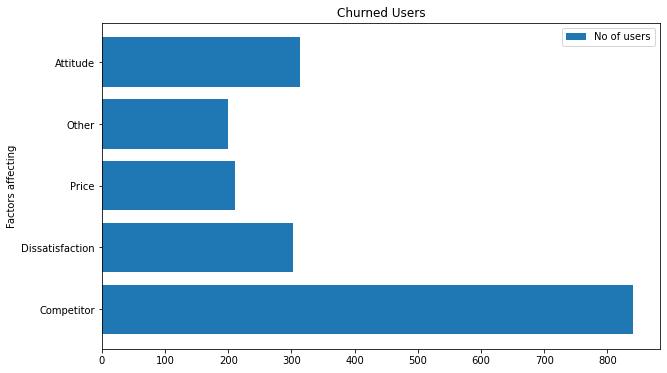

In [86]:
graph={}
for i in df['Churn Category']:
  if i in graph:
    if pd.isna(i):
      continue 
    graph[i]+=1
  else:
    if pd.isna(i):
      continue
    graph[i]=1
x=[]
y=[]
for i in graph:
  x.append(i)
  y.append(int(graph[i]))
xpos = np.arange(len(x))
xpos
plt.figure(figsize=(10,6))
plt.barh(xpos,y, label="No of users")
plt.yticks(xpos,x)
plt.ylabel("Factors affecting")
plt.title('Churned Users')
plt.legend()
#All the different types of factors and number of users leaving because of that particular factor.

Competitor had better devices                313
Competitor made better offer                 311
Attitude of support person                   220
Don't know                                   130
Competitor offered more data                 117
Competitor offered higher download speeds    100
Attitude of service provider                  94
Price too high                                78
Product dissatisfaction                       77
Network reliability                           72
Long distance charges                         64
Service dissatisfaction                       63
Moved                                         46
Extra data charges                            39
Limited range of services                     37
Poor expertise of online support              31
Lack of affordable download/upload speed      30
Lack of self-service on Website               29
Poor expertise of phone support               12
Deceased                                       6
Name: Churn Reason, 

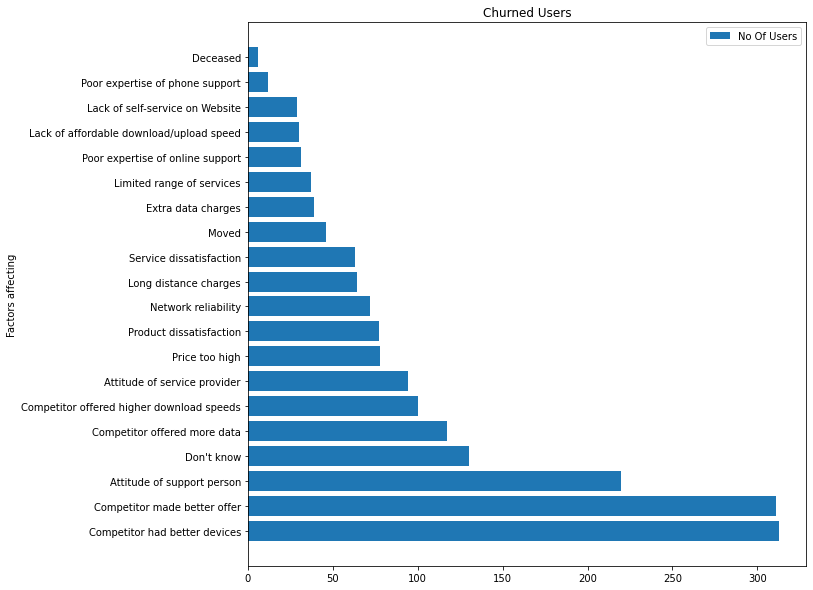

In [87]:
arr=df['Churn Reason'].value_counts()
print(arr)
content = arr.to_dict()
x=[]
y=[]
for i in content:
  x.append(i)
  y.append(content[i])
xpos = np.arange(len(x))
xpos
plt.figure(figsize=(10,10))
plt.barh(xpos,y, label="No Of Users")

plt.yticks(xpos,x)
plt.ylabel("Factors affecting")
plt.title('Churned Users')
plt.legend()
#getting a more clear picture 

In [88]:
Category_grp = df.groupby(['Churn Category'])
Category_grp.get_group('Competitor')
#Grouping and seeing the churn category

,Satisfaction Score,Customer Status,Churn Label,Churn Category,Churn Reason,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Customer ID.1,Country,State,City,Zip Code,Latitude,Longitude
Customer ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8779-QRDMV,3,Churned,Yes,Competitor,Competitor offered more data,Male,78,No,Yes,No,No,0,DSL,8,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,8779-QRDMV,United States,California,Los Angeles,90022,34.023810,-118.156582
7495-OOKFY,3,Churned,Yes,Competitor,Competitor made better offer,Female,74,No,Yes,Yes,Yes,1,Fiber Optic,17,No,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,7495-OOKFY,United States,California,Los Angeles,90063,34.044271,-118.185237
1658-BYGOY,2,Churned,Yes,Competitor,Competitor made better offer,Male,71,No,Yes,No,Yes,3,Fiber Optic,52,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,1658-BYGOY,United States,California,Los Angeles,90065,34.108833,-118.229715
4412-YLTKF,1,Churned,Yes,Competitor,Competitor had better devices,Female,72,No,Yes,No,Yes,1,Fiber Optic,18,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,78.05,2135.50,4412-YLTKF,United States,California,Pico Rivera,90660,33.989524,-118.089299
9947-OTFQU,1,Churned,Yes,Competitor,Competitor had better devices,Male,65,No,Yes,No,No,0,Fiber Optic,29,No,Yes,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,74.40,1074.30,9947-OTFQU,United States,California,Covina,91722,34.097345,-117.906736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5482-NUPNA,1,Churned,Yes,Competitor,Competitor had better devices,Female,28,Yes,No,No,No,0,Cable,59,Yes,Yes,No,Yes,Yes,Month-to-Month,Yes,Credit Card,60.40,272.15,5482-NUPNA,United States,California,Imperial,92251,32.858595,-115.662709
1122-JWTJW,1,Churned,Yes,Competitor,Competitor had better devices,Male,64,No,No,Yes,Yes,2,Fiber Optic,26,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,70.65,70.65,1122-JWTJW,United States,California,Ocotillo,92259,32.698964,-115.886656
1699-HPSBG,3,Churned,Yes,Competitor,Competitor offered higher download speeds,Male,44,No,No,No,No,0,Cable,23,No,No,No,Yes,Yes,One Year,Yes,Bank Withdrawal,59.80,727.80,1699-HPSBG,United States,California,Palm Springs,92264,33.745746,-116.514215


In [89]:
Category_grp['Churn Reason'].value_counts(normalize=True).loc['Competitor']
#subgroups of Competitors that is Churn Reasons
#can see the weight of each churn reason
# competitor

Churn Reason
Competitor had better devices                0.372176
Competitor made better offer                 0.369798
Competitor offered more data                 0.139120
Competitor offered higher download speeds    0.118906
Name: Churn Reason, dtype: float64

In [90]:
Category_grp['Churn Reason'].value_counts(normalize=True).loc['Attitude']
#Attitude

Churn Reason
Attitude of support person      0.700637
Attitude of service provider    0.299363
Name: Churn Reason, dtype: float64

In [91]:
Category_grp['Churn Reason'].value_counts(normalize=True).loc['Dissatisfaction']
#Dissatisfaction

Churn Reason
Product dissatisfaction             0.254125
Network reliability                 0.237624
Service dissatisfaction             0.207921
Limited range of services           0.122112
Lack of self-service on Website     0.095710
Poor expertise of online support    0.042904
Poor expertise of phone support     0.039604
Name: Churn Reason, dtype: float64

In [92]:
Category_grp['Churn Reason'].value_counts(normalize=True).loc['Price']
#price

Churn Reason
Price too high                              0.369668
Long distance charges                       0.303318
Extra data charges                          0.184834
Lack of affordable download/upload speed    0.142180
Name: Churn Reason, dtype: float64

In [93]:
place=df.groupby('Churn Label')
extraaa=place.get_group('Yes')
ext=extraaa.groupby(['City'])
ext.get_group('San Diego')

,Satisfaction Score,Customer Status,Churn Label,Churn Category,Churn Reason,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Customer ID.1,Country,State,City,Zip Code,Latitude,Longitude
Customer ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7534-BFESC,2,Churned,Yes,Competitor,Competitor made better offer,Male,69,No,Yes,No,No,0,Fiber Optic,15,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.10,1712.70,7534-BFESC,United States,California,San Diego,92122,32.857230,-117.209774
8098-LLAZX,3,Churned,Yes,Competitor,Competitor made better offer,Female,74,No,Yes,No,No,0,Fiber Optic,2,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,396.10,8098-LLAZX,United States,California,San Diego,92122,32.857230,-117.209774
0265-EDXBD,2,Churned,Yes,Attitude,Attitude of support person,Male,76,No,Yes,Yes,No,0,Fiber Optic,10,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,74.90,2303.35,0265-EDXBD,United States,California,San Diego,92122,32.857230,-117.209774
2840-XANRC,2,Churned,Yes,Competitor,Competitor made better offer,Male,77,No,Yes,Yes,No,0,Cable,12,No,No,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,93.15,2231.05,2840-XANRC,United States,California,San Diego,92122,32.857230,-117.209774
5020-ZSTTY,1,Churned,Yes,Competitor,Competitor made better offer,Female,70,No,Yes,No,No,0,DSL,5,Yes,Yes,No,Yes,Yes,One Year,No,Bank Withdrawal,82.45,4350.10,5020-ZSTTY,United States,California,San Diego,92122,32.857230,-117.209774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4662-EKDPQ,1,Churned,Yes,Competitor,Competitor made better offer,Male,44,No,No,No,No,0,Cable,20,No,No,No,No,Yes,Month-to-Month,No,Bank Withdrawal,62.05,118.30,4662-EKDPQ,United States,California,San Diego,92121,32.898613,-117.202937
8155-IBNHG,3,Churned,Yes,Attitude,Attitude of support person,Female,55,No,No,Yes,No,0,Fiber Optic,29,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,75.40,1747.85,8155-IBNHG,United States,California,San Diego,92103,32.747484,-117.166877
4745-LSPLO,2,Churned,Yes,Attitude,Attitude of support person,Male,22,Yes,No,No,No,0,None,0,No,No,No,No,No,Month-to-Month,No,Credit Card,20.50,20.50,4745-LSPLO,United States,California,San Diego,92111,32.805518,-117.169052


{'Competitor made better offer': 0.7891891891891892, "Don't know": 0.08108108108108109, 'Attitude of support person': 0.043243243243243246, 'Competitor had better devices': 0.032432432432432434, 'Attitude of service provider': 0.010810810810810811, 'Long distance charges': 0.010810810810810811, 'Poor expertise of online support': 0.010810810810810811, 'Product dissatisfaction': 0.010810810810810811, 'Lack of self-service on Website': 0.005405405405405406, 'Network reliability': 0.005405405405405406}


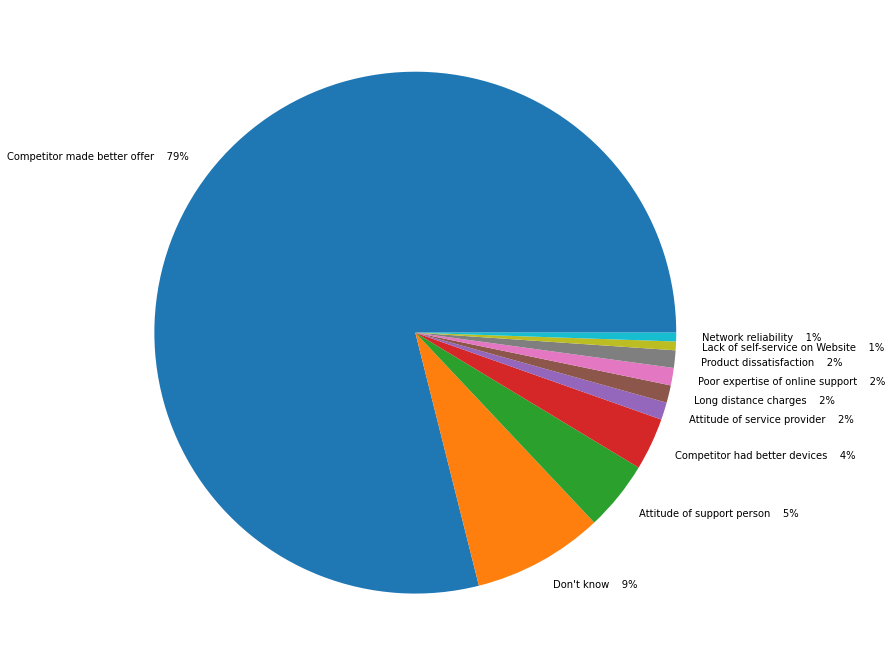

In [94]:
#churn category and churn reasons of particular city
#San Diego

arr=ext['Churn Reason'].value_counts(normalize=True).loc['San Diego']
content = arr.to_dict()
print(content)
x=[]
y=[]
import math
for i in content:
  x.append(i+"    "+str(math.ceil(content[i]*100))+"%")
  y.append(content[i])
# xpos = np.arange(len(x))
# xpos
# plt.figure(figsize=(10,6))
# plt.barh(xpos,y, label="No Of Users")

# plt.yticks(xpos,x)
# plt.ylabel("Factors affecting")
# plt.title('Churned Users only in San Diego')
# plt.legend()

# Creating plot
fig = plt.figure(figsize =(12, 12))
plt.pie(y, labels = x)
 
# show plot
plt.show()

In [95]:
ext.get_group('Los Angeles')

,Satisfaction Score,Customer Status,Churn Label,Churn Category,Churn Reason,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Customer ID.1,Country,State,City,Zip Code,Latitude,Longitude
Customer ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8779-QRDMV,3,Churned,Yes,Competitor,Competitor offered more data,Male,78,No,Yes,No,No,0,DSL,8,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,8779-QRDMV,United States,California,Los Angeles,90022,34.023810,-118.156582
7495-OOKFY,3,Churned,Yes,Competitor,Competitor made better offer,Female,74,No,Yes,Yes,Yes,1,Fiber Optic,17,No,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,7495-OOKFY,United States,California,Los Angeles,90063,34.044271,-118.185237
1658-BYGOY,2,Churned,Yes,Competitor,Competitor made better offer,Male,71,No,Yes,No,Yes,3,Fiber Optic,52,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,1658-BYGOY,United States,California,Los Angeles,90065,34.108833,-118.229715
9885-CSMWE,1,Churned,Yes,Dissatisfaction,Product dissatisfaction,Female,65,No,Yes,No,No,0,Fiber Optic,13,No,No,No,No,Yes,Month-to-Month,No,Bank Withdrawal,78.45,78.45,9885-CSMWE,United States,California,Los Angeles,90007,34.027337,-118.285150
7657-DYEPJ,3,Churned,Yes,Price,Lack of affordable download/upload speed,Male,73,No,Yes,No,No,0,Cable,30,No,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,70.15,2497.35,7657-DYEPJ,United States,California,Los Angeles,90024,34.066303,-118.435479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4415-IJZTP,1,Churned,Yes,Competitor,Competitor had better devices,Female,33,No,No,No,No,0,Fiber Optic,25,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,74.50,74.50,4415-IJZTP,United States,California,Los Angeles,90027,34.127194,-118.295647
1465-VINDH,3,Churned,Yes,Competitor,Competitor offered higher download speeds,Female,31,No,No,Yes,No,0,Fiber Optic,22,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Credit Card,102.10,1068.85,1465-VINDH,United States,California,Los Angeles,90028,34.099869,-118.326843
2810-FTLEM,2,Churned,Yes,Competitor,Competitor offered higher download speeds,Female,21,Yes,No,No,No,0,DSL,53,Yes,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,50.15,762.25,2810-FTLEM,United States,California,Los Angeles,90036,34.070291,-118.349191


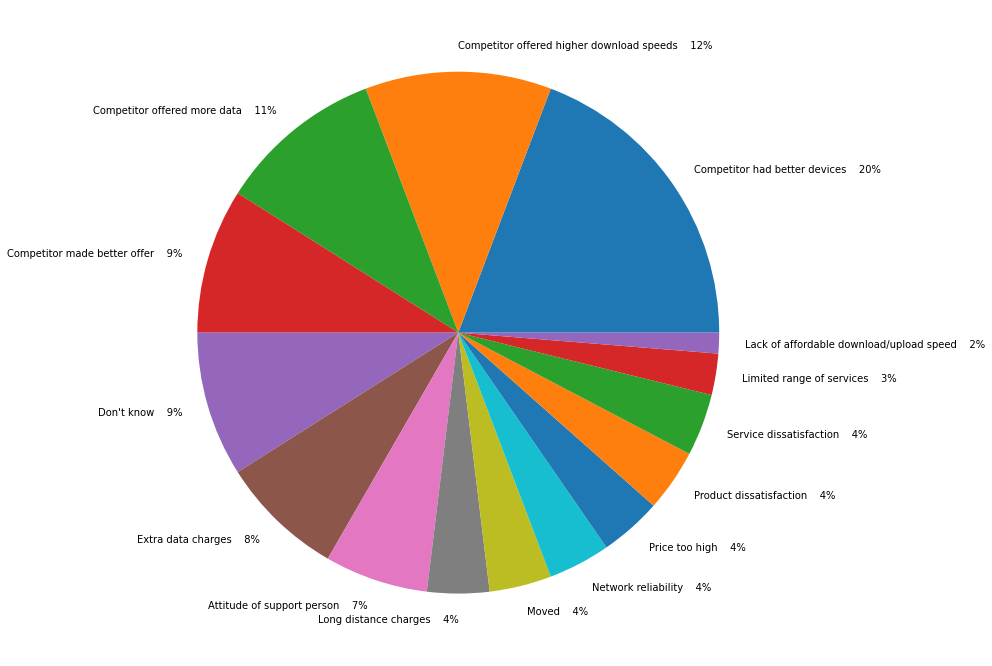

In [96]:
#churn category and churn reasons of particular city
#Los Angeles

arr=ext['Churn Reason'].value_counts(normalize=True).loc['Los Angeles']
content = arr.to_dict()
x=[]
y=[]
for i in content:
  x.append(i+"    "+str(math.ceil(content[i]*100))+"%")
  y.append(content[i])
# xpos = np.arange(len(x))
# xpos
# plt.figure(figsize=(10,8))
# plt.barh(xpos,y, label="No Of Users")

# plt.yticks(xpos,x)
# plt.ylabel("Factors")
# plt.title('Churned Users only in Los Angeles')
# plt.legend()

# Creating plot
fig = plt.figure(figsize =(12, 12))
plt.pie(y, labels = x)
 
# show plot
plt.show()

In [97]:
place['City'].value_counts().loc['Yes']
#Country wise churned users

City
San Diego         185
Los Angeles        78
San Francisco      31
San Jose           29
Fallbrook          26
                 ... 
Woodland Hills      1
Yermo               1
Yorkville           1
Yucaipa             1
Zenia               1
Name: City, Length: 777, dtype: int64

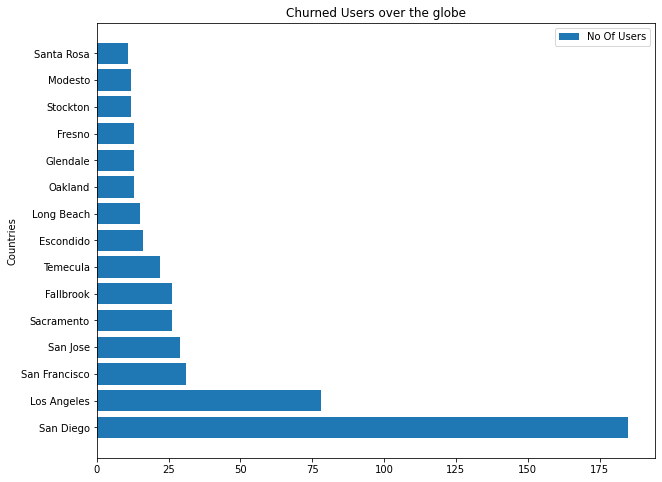

In [98]:
#all churned users over the globe and their city

arr=place['City'].value_counts().loc['Yes']
content = arr.to_dict()
over=[]
x=[]
y=[]
for i in content:
  over.append([content[i],i])
over.sort()
over=over[::-1]
for i in range(15):
  x.append(over[i][1])
  y.append(over[i][0])
xpos = np.arange(len(x))
xpos
plt.figure(figsize=(10,8))
plt.barh(xpos,y, label="No Of Users")

plt.yticks(xpos,x)
plt.ylabel("Countries")
plt.title('Churned Users over the globe')
plt.legend()

In [99]:
#internet Type

place=df.groupby('Churn Label')
for_type=place.get_group('Yes')
internet_type=extraaa.groupby(['Internet Type'])
place['Internet Type'].value_counts().loc['Yes']

Internet Type
Fiber Optic    1236
DSL             307
Cable           213
None            113
Name: Internet Type, dtype: int64

In [100]:
#churn Reasons for internet type as Fiber Optic

internet_type['Churn Reason'].value_counts().loc['Fiber Optic']

Churn Reason
Competitor had better devices                219
Competitor made better offer                 219
Attitude of support person                   133
Competitor offered more data                  87
Don't know                                    82
Attitude of service provider                  66
Competitor offered higher download speeds     62
Price too high                                53
Product dissatisfaction                       53
Network reliability                           45
Service dissatisfaction                       43
Moved                                         31
Extra data charges                            27
Long distance charges                         26
Limited range of services                     24
Lack of affordable download/upload speed      20
Poor expertise of online support              20
Lack of self-service on Website               16
Poor expertise of phone support                6
Deceased                                       4
Name: C

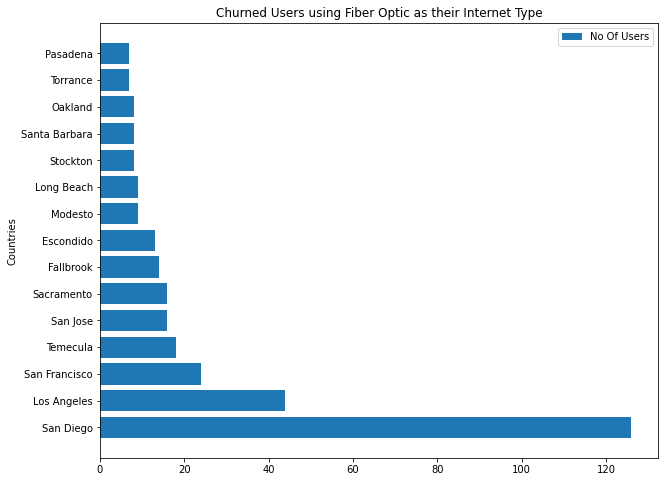

In [101]:
#country wise churned users using internet type as Fiber Optic

arr=internet_type['City'].value_counts().loc['Fiber Optic']
content = arr.to_dict()
over=[]
x=[]
y=[]
for i in content:
  over.append([content[i],i])
over.sort()
over=over[::-1]

#only seeing the top 15 counties 

for i in range(15):
  x.append(over[i][1])
  y.append(over[i][0])
xpos = np.arange(len(x))
xpos
plt.figure(figsize=(10,8))
plt.barh(xpos,y, label="No Of Users")

plt.yticks(xpos,x)
plt.ylabel("Countries")
plt.title('Churned Users using Fiber Optic as their Internet Type')
plt.legend()

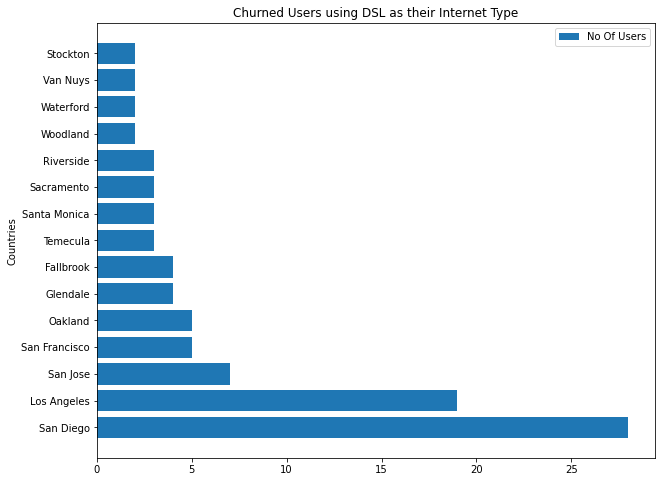

In [102]:
#country wise churned users using internet type as DSL  
    
arr=internet_type['City'].value_counts().loc['DSL']
content = arr.to_dict()
over=[]
x=[]
y=[]
for i in content:
  over.append([content[i],i])
over.sort()
over=over[::-1]

#only seeing the top 15 counties 

for i in range(15):
  x.append(over[i][1])
  y.append(over[i][0])
xpos = np.arange(len(x))
xpos
plt.figure(figsize=(10,8))
plt.barh(xpos,y, label="No Of Users")

plt.yticks(xpos,x)
plt.ylabel("Countries")
plt.title('Churned Users using DSL as their Internet Type')
plt.legend()